<a href="https://colab.research.google.com/github/Purohit1999/Data_Science/blob/main/K_Means_Clustring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kneed

In [3]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from kneed import KneeLocator

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only first two features: 'sepal length' and 'sepal width' for 2D plot


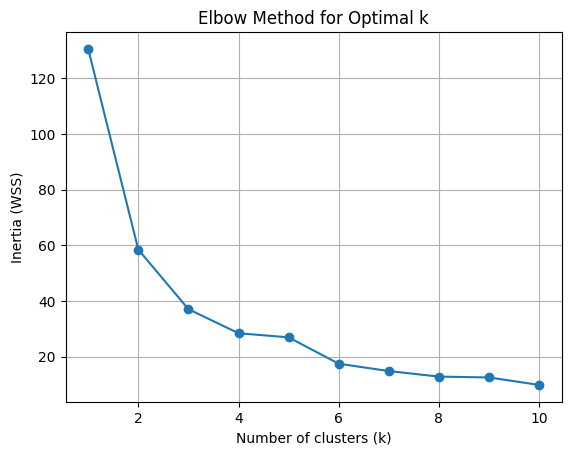

Optimal number of clusters (k): 3


In [4]:
# Try clustering with k = 1 to 10 and record inertia (within-cluster sum of squares)
inertias = []
k_range = range(1, 11)
for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    inertias.append(model.inertia_)

# Plot the Elbow curve
plt.plot(k_range, inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (WSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Automatically detect the "elbow" point
kl = KneeLocator(k_range, inertias, curve='convex', direction='decreasing')
optimal_k = kl.elbow
print("Optimal number of clusters (k):", optimal_k)


In [5]:
# Fit model using the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)

# Extract labels (cluster assignment) and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_


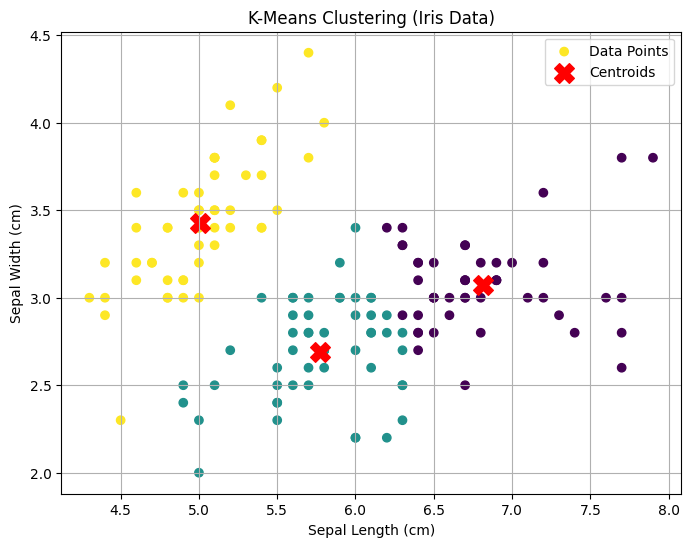

In [6]:
# Scatter plot of data points colored by cluster label
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', label='Data Points')

# Mark the centroids with red 'X' markers
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', c='red', s=200, label='Centroids')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('K-Means Clustering (Iris Data)')
plt.legend()
plt.grid(True)
plt.show()


🧠 Insights
Inertia helps evaluate how well clusters fit. Lower is better.

Score = -Inertia: sklearn uses negative scoring for consistency with other estimators.

Centroids show the geometric center of each cluster.

KneeLocator provides an automated way to determine the optimal number of clusters.